# Correlação de Estoque de CDB-DI e Taxa DI(Depósito Interfinanceiro: PRÉ - Over)

In [2]:
import pandas as pd

In [3]:
taxa_di = pd.read_excel("Taxas - DI PRÉ - Over.xlsx")

In [4]:
taxa_di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6026 entries, 0 to 6025
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        6026 non-null   datetime64[ns]
 1   Taxa SELIC  6026 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 94.3 KB


In [5]:
# Carregar a série temporal
data = pd.read_csv('Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas.csv', encoding='ISO-8859-1', sep=';', parse_dates=['Data'], index_col='Data')


In [6]:
# Converte a coluna removendo pontos e trocando a vírgula por ponto
data['1168 - Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas - u.m.c. (mil)'] = (
    data['1168 - Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas - u.m.c. (mil)']
    .str.replace('.', '', regex=False)  # Remove os pontos
    .str.replace(',', '.', regex=False)  # Troca a vírgula por ponto
    .astype(float)                       # Converte para float
)

# Verifica a conversão
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5020 entries, 02/01/2004 to 29/12/2023
Data columns (total 1 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   1168 - Saldo em juros flutuantes DI de depositos a prazo (CDBRDB) - Pessoas fisicas - u.m.c. (mil)  5020 non-null   float64
dtypes: float64(1)
memory usage: 78.4+ KB
None


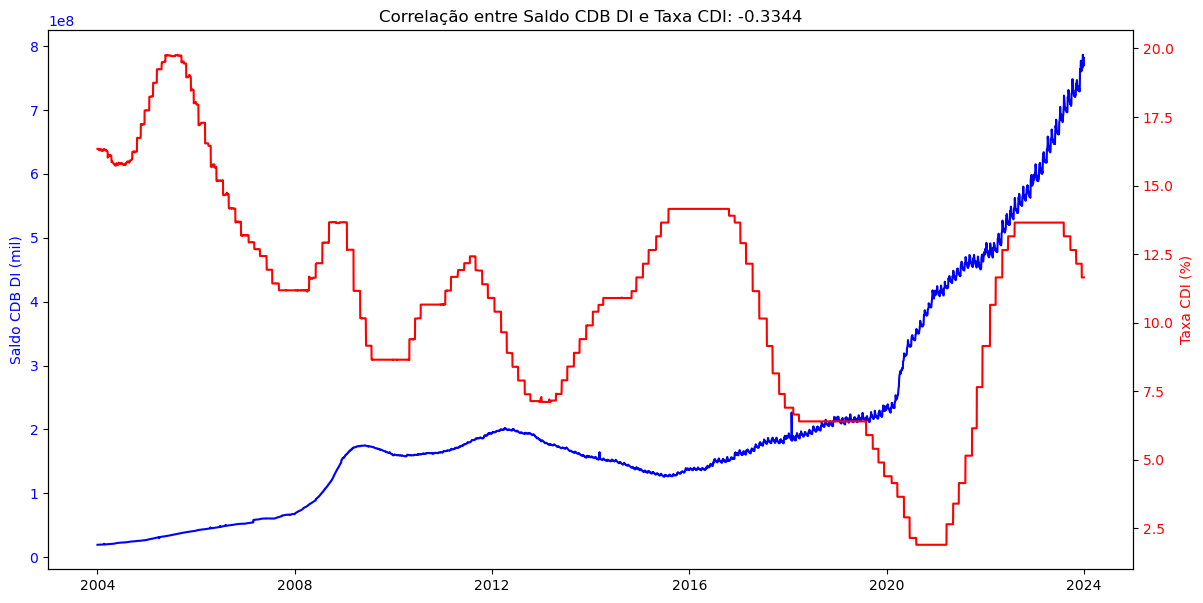

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Passo 1: Definir a coluna 'Data' como índice no data frame taxa_di
taxa_di.set_index('Data', inplace=True)

# Passo 2: Certificar-se de que o índice do data frame 'data' também é datetime para poder fazer o merge
data.index = pd.to_datetime(data.index, format='%d/%m/%Y')

# Passo 3: Unir os data frames baseando-se nas datas
merged_data = data.join(taxa_di, how='inner')

# Passo 4: Calcular a correlação entre as duas colunas
correlation = merged_data.corr().iloc[0, 1]

# Passo 5: Plotar os gráficos dos dois data frames e mostrar o coeficiente de correlação
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico 1: Saldo de CDB DI
ax1.plot(merged_data.index, merged_data.iloc[:, 0], label='Saldo CDB DI', color='blue')
ax1.set_ylabel('Saldo CDB DI (mil)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar um segundo eixo y compartilhando o mesmo eixo x
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data.iloc[:, 1], label='Taxa CDI', color='red')
ax2.set_ylabel('Taxa CDI (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Exibir o título com a correlação
plt.title(f'Correlação entre Saldo CDB DI e Taxa CDI: {correlation:.4f}')

# Mostrar o gráfico
plt.show()


### Normalização da série

1. Normalização das Séries: Vamos padronizar ambas as séries temporais para que elas tenham média 0 e desvio padrão 1 (z-score normalization). Isso ajuda a eliminar possíveis diferenças de escala entre as duas séries.

2. Correlação Cruzada: Além de uma simples correlação de Pearson, utilizaremos a técnica de Correlação Cruzada (Cross-Correlation), que ajuda a identificar possíveis lags (atrasos) entre as duas séries e como esses atrasos afetam a correlação entre elas.

3. Visualização das Séries Normalizadas: Visualizamos as séries normalizadas ao longo do tempo para verificar se há uma correspondência mais clara visualmente.

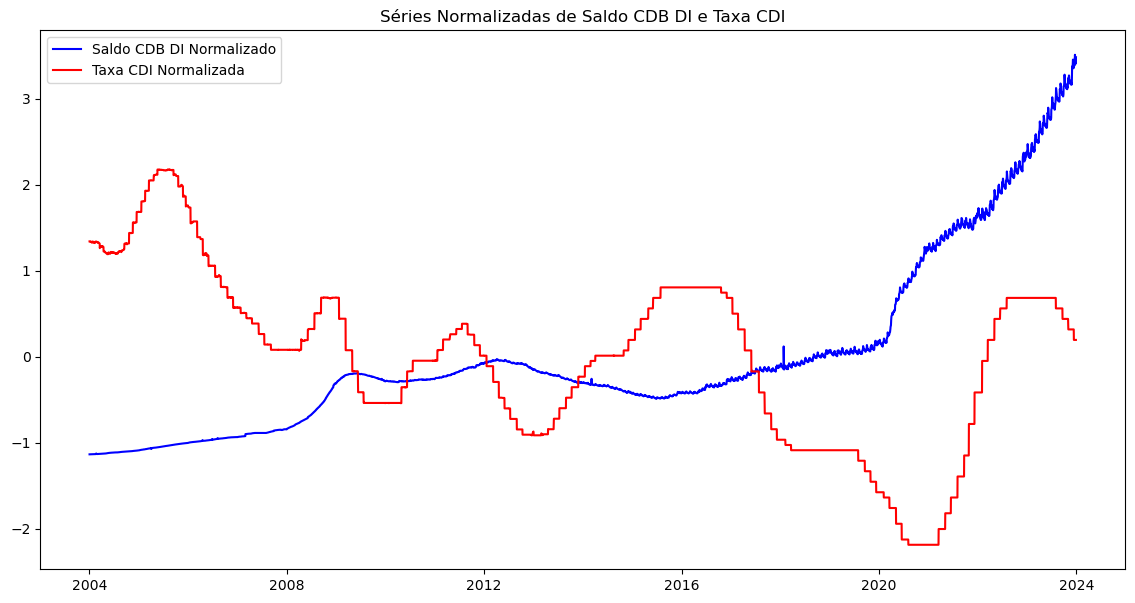

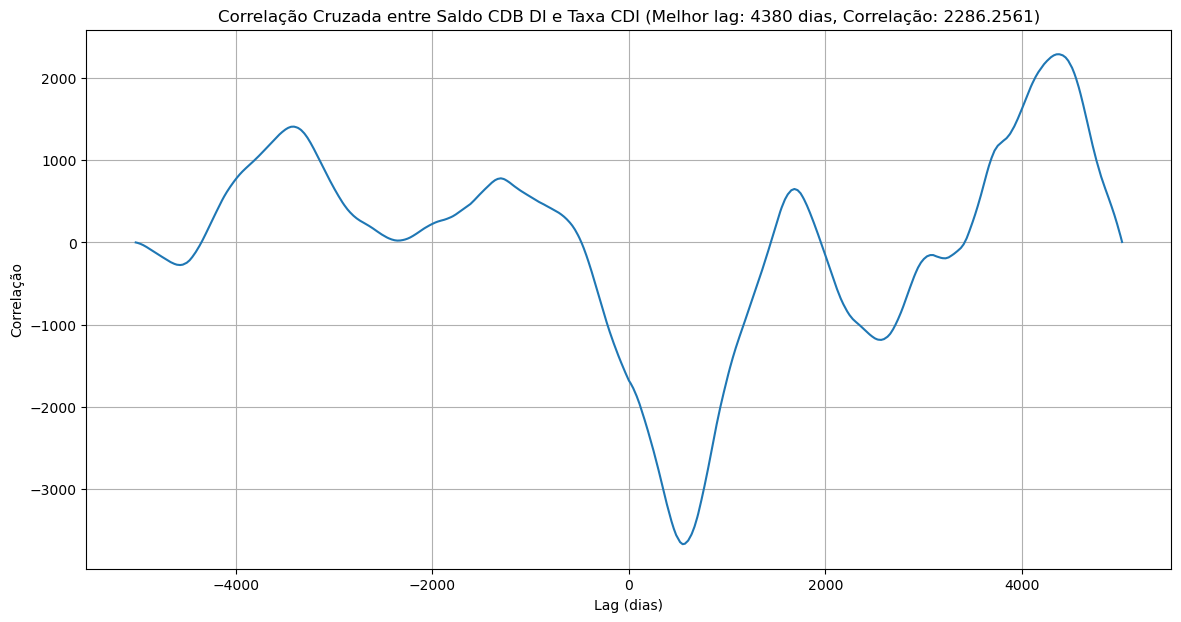

Melhor lag encontrado: 4380 dias com correlação de 2286.2561


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.stats import zscore

# Passo 1: Normalizar ambas as séries utilizando Z-score (normalização para média 0 e desvio padrão 1)
merged_data['Saldo CDB DI Normalizado'] = zscore(merged_data.iloc[:, 0])
merged_data['Taxa CDI Normalizada'] = zscore(merged_data.iloc[:, 1])

# Passo 2: Plotar as séries normalizadas
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['Saldo CDB DI Normalizado'], label='Saldo CDB DI Normalizado', color='blue')
plt.plot(merged_data.index, merged_data['Taxa CDI Normalizada'], label='Taxa CDI Normalizada', color='red')
plt.title('Séries Normalizadas de Saldo CDB DI e Taxa CDI')
plt.legend()
plt.show()

# Passo 3: Calcular a correlação cruzada entre as duas séries normalizadas
cbd_normalizado = merged_data['Saldo CDB DI Normalizado'].dropna().values
cdi_normalizado = merged_data['Taxa CDI Normalizada'].dropna().values
correlation_lags = correlate(cbd_normalizado, cdi_normalizado, mode='full')
lags = np.arange(-len(cdi_normalizado) + 1, len(cbd_normalizado))

# Passo 4: Identificar o lag com maior correlação
max_corr_lag = lags[np.argmax(correlation_lags)]
max_corr_value = np.max(correlation_lags)

# Passo 5: Plotar a correlação cruzada ao longo dos lags
plt.figure(figsize=(14, 7))
plt.plot(lags, correlation_lags)
plt.title(f'Correlação Cruzada entre Saldo CDB DI e Taxa CDI (Melhor lag: {max_corr_lag} dias, Correlação: {max_corr_value:.4f})')
plt.xlabel('Lag (dias)')
plt.ylabel('Correlação')
plt.grid(True)
plt.show()

# Exibir o lag e o valor de correlação máxima
print(f"Melhor lag encontrado: {max_corr_lag} dias com correlação de {max_corr_value:.4f}")


### Diferenciação Logarítmica

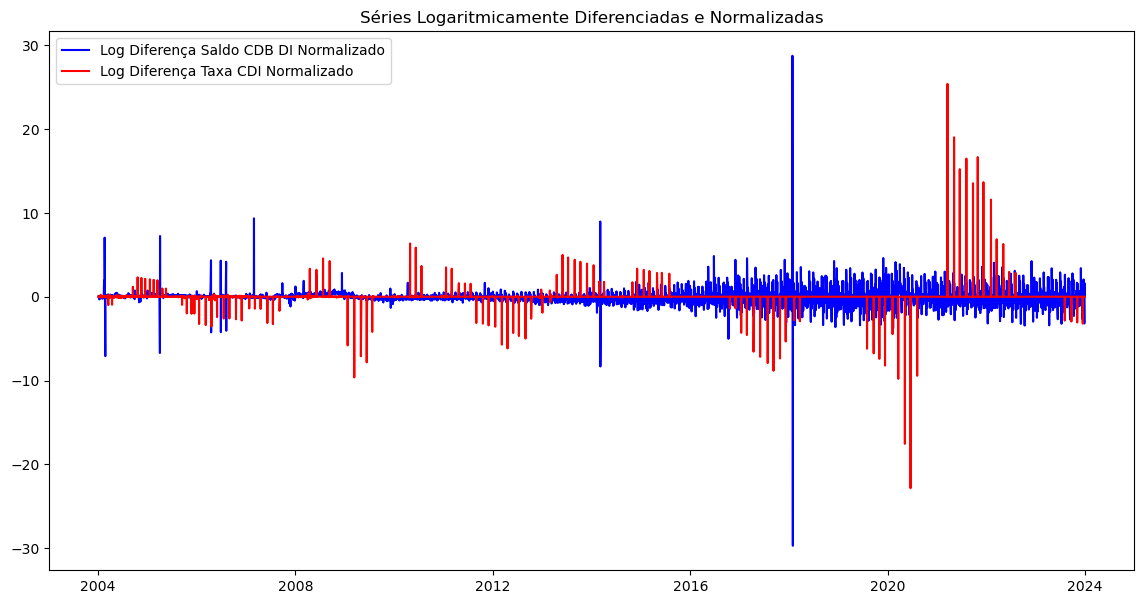

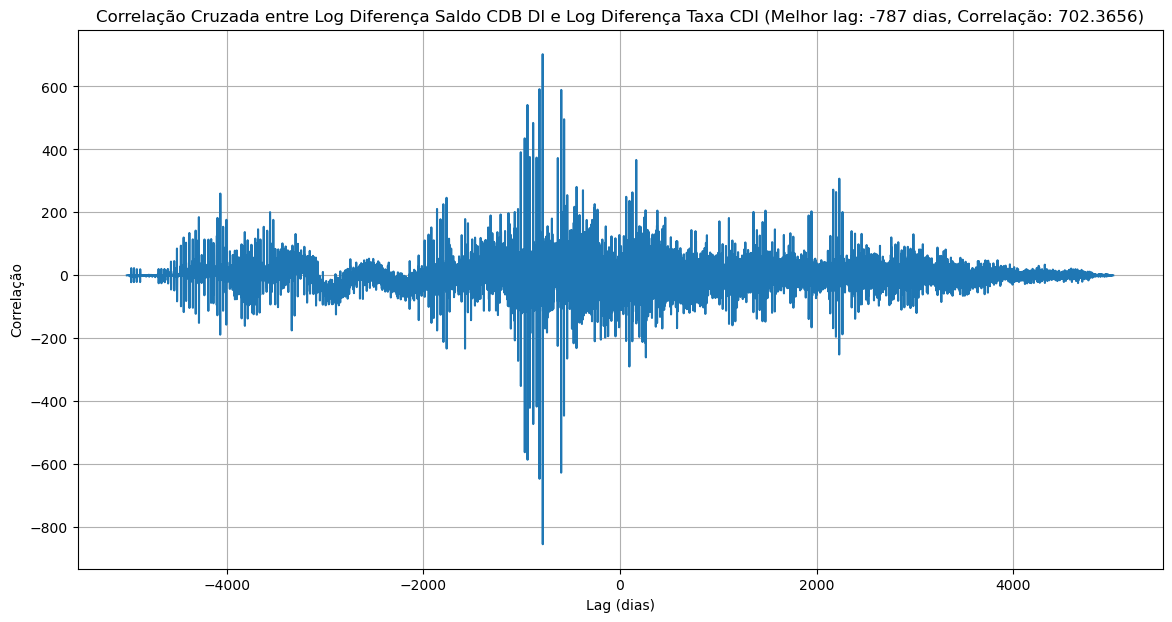

Melhor lag encontrado: -787 dias com correlação de 702.3656


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.stats import zscore

# Passo 1: Aplicar a diferenciação logarítmica para obter as taxas de variação
merged_data['Log Diferença Saldo CDB DI'] = np.log(merged_data.iloc[:, 0]).diff()
merged_data['Log Diferença Taxa CDI'] = np.log(merged_data.iloc[:, 1]).diff()

# Remover os valores NaN gerados pela diferenciação
merged_data.dropna(inplace=True)

# Passo 2: Normalizar ambas as séries diferenciadas (Z-score)
merged_data['Saldo CDB DI Normalizado'] = zscore(merged_data['Log Diferença Saldo CDB DI'])
merged_data['Taxa CDI Normalizado'] = zscore(merged_data['Log Diferença Taxa CDI'])

# Passo 3: Plotar as séries normalizadas diferenciadas
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['Saldo CDB DI Normalizado'], label='Log Diferença Saldo CDB DI Normalizado', color='blue')
plt.plot(merged_data.index, merged_data['Taxa CDI Normalizado'], label='Log Diferença Taxa CDI Normalizado', color='red')
plt.title('Séries Logaritmicamente Diferenciadas e Normalizadas')
plt.legend()
plt.show()

# Passo 4: Calcular a correlação cruzada entre as séries normalizadas diferenciadas
cbd_diff_normalizado = merged_data['Saldo CDB DI Normalizado'].values
cdi_diff_normalizado = merged_data['Taxa CDI Normalizado'].values
correlation_lags = correlate(cbd_diff_normalizado, cdi_diff_normalizado, mode='full')
lags = np.arange(-len(cdi_diff_normalizado) + 1, len(cbd_diff_normalizado))

# Passo 5: Identificar o lag com maior correlação
max_corr_lag = lags[np.argmax(correlation_lags)]
max_corr_value = np.max(correlation_lags)

# Passo 6: Plotar a correlação cruzada ao longo dos lags
plt.figure(figsize=(14, 7))
plt.plot(lags, correlation_lags)
plt.title(f'Correlação Cruzada entre Log Diferença Saldo CDB DI e Log Diferença Taxa CDI (Melhor lag: {max_corr_lag} dias, Correlação: {max_corr_value:.4f})')
plt.xlabel('Lag (dias)')
plt.ylabel('Correlação')
plt.grid(True)
plt.show()

# Exibir o lag e o valor de correlação máxima
print(f"Melhor lag encontrado: {max_corr_lag} dias com correlação de {max_corr_value:.4f}")


### Teste de Granger 

#### Série Original

In [16]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Supondo que 'taxa_di' e 'data' já estão carregados como DataFrames

# Verificando as primeiras linhas do DataFrame taxa_di
print(taxa_di.head())
print(data.head())

# Renomeando a coluna do saldo para um nome mais amigável
data.columns = ['Saldo_CDI']

# Garantindo que os índices de ambos os DataFrames estão no formato datetime
taxa_di.index = pd.to_datetime(taxa_di.index)  # Certificando-se de que o índice de taxa_di está em datetime
data.index = pd.to_datetime(data.index)  # Certificando-se de que o índice de data está em datetime

# Verificando a sobreposição de datas
common_dates = taxa_di.index.intersection(data.index)
print("Datas comuns:", common_dates)

# Mesclando os DataFrames com base nas datas comuns
merged_data = pd.merge(taxa_di, data, left_index=True, right_index=True, how='inner')

# Verificando as primeiras linhas do DataFrame mesclado
print(merged_data.head())

# Verifique se o DataFrame mesclado não está vazio
if not merged_data.empty:
    # Definindo as variáveis de interesse
    y = merged_data['Saldo_CDI']  # Saldo de CDI
    x = merged_data['Taxa SELIC']  # Taxa SELIC

    # Realizando o teste de causalidade de Granger
    max_lag = 5  # Você pode ajustar o número de lags de acordo com sua análise
    test_result = grangercausalitytests(merged_data[['Saldo_CDI', 'Taxa SELIC']], max_lag, verbose=True)
else:
    print("Não há dados suficientes para realizar o teste de causalidade de Granger.")


            Taxa SELIC
Data                  
2000-01-03       19.04
2000-01-04       19.04
2000-01-05       19.05
2000-01-06       19.07
2000-01-07       19.07
              Saldo_CDI
Data                   
2004-01-02  19436701.72
2004-01-05  19459816.07
2004-01-06  19475927.06
2004-01-07  19487590.68
2004-01-08  19495126.65
Datas comuns: DatetimeIndex(['2004-01-02', '2004-01-05', '2004-01-06', '2004-01-07',
               '2004-01-08', '2004-01-09', '2004-01-12', '2004-01-13',
               '2004-01-14', '2004-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Data', length=5020, freq=None)
            Taxa SELIC    Saldo_CDI
Data                               
2004-01-02       16.34  19436701.72
2004-01-05       16.34  19459816.07
2004-01-06       16.34  19475927.06
2004-01-07  

c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


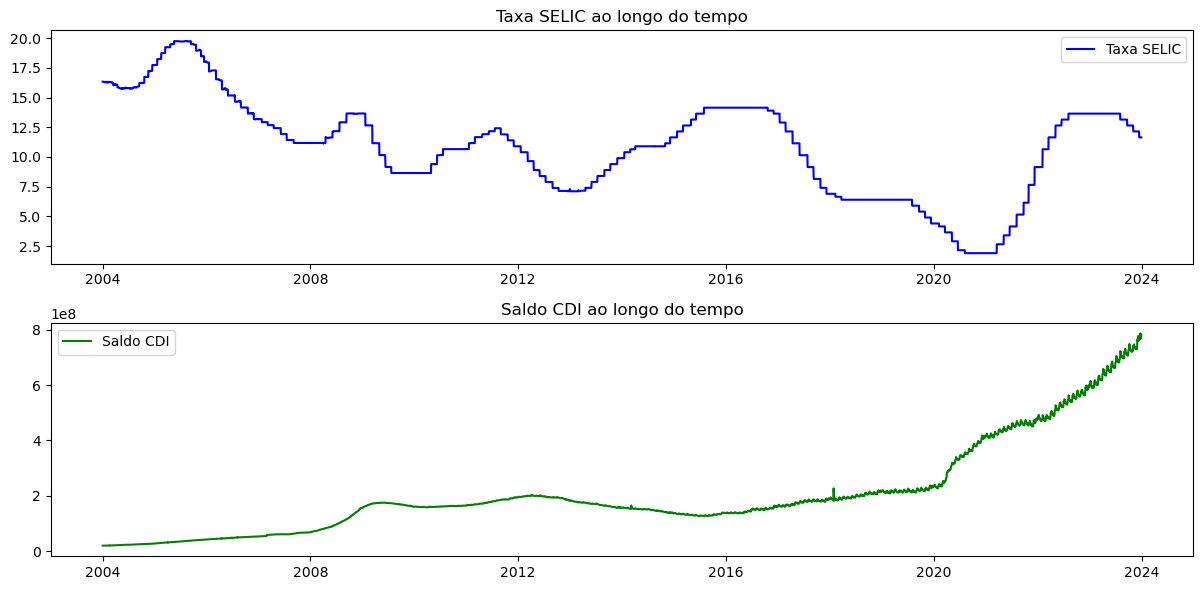

In [17]:
import matplotlib.pyplot as plt

# Plotando as séries
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(merged_data.index, merged_data['Taxa SELIC'], label='Taxa SELIC', color='blue')
plt.title('Taxa SELIC ao longo do tempo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_data.index, merged_data['Saldo_CDI'], label='Saldo CDI', color='green')
plt.title('Saldo CDI ao longo do tempo')
plt.legend()

plt.tight_layout()
plt.show()


#### Série Diferenciada

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Supondo que 'taxa_di' e 'data' já estão carregados como DataFrames

# Verificando as primeiras linhas do DataFrame taxa_di
print(taxa_di.head())
print(data.head())

# Renomeando a coluna do saldo para um nome mais amigável
data.columns = ['Saldo_CDI']

# Garantindo que os índices de ambos os DataFrames estão no formato datetime
taxa_di.index = pd.to_datetime(taxa_di.index)  # Certificando-se de que o índice de taxa_di está em datetime
data.index = pd.to_datetime(data.index)  # Certificando-se de que o índice de data está em datetime

# Verificando a sobreposição de datas
common_dates = taxa_di.index.intersection(data.index)
print("Datas comuns:", common_dates)

# Mesclando os DataFrames com base nas datas comuns
merged_data = pd.merge(taxa_di, data, left_index=True, right_index=True, how='inner')

# Verificando as primeiras linhas do DataFrame mesclado
print(merged_data.head())

# Verifique se o DataFrame mesclado não está vazio
if not merged_data.empty:
    # Aplicando a diferenciação para tornar as séries estacionárias
    merged_data['Saldo_CDI_diff'] = merged_data['Saldo_CDI'].diff().dropna()  # Diferenciação no saldo de CDI
    merged_data['Taxa_SELIC_diff'] = merged_data['Taxa SELIC'].diff().dropna()  # Diferenciação na Taxa SELIC

    # Removendo valores nulos gerados pela diferenciação
    merged_data.dropna(inplace=True)

    # Verificando as primeiras linhas após a diferenciação
    print(merged_data.head())

    # Definindo as variáveis de interesse (séries diferenciadas)
    y_diff = merged_data['Saldo_CDI_diff']  # Saldo de CDI diferenciado
    x_diff = merged_data['Taxa_SELIC_diff']  # Taxa SELIC diferenciada

    # Realizando o teste de causalidade de Granger com as séries diferenciadas
    max_lag = 5  # Ajustar o número de lags conforme a análise
    test_result = grangercausalitytests(merged_data[['Saldo_CDI_diff', 'Taxa_SELIC_diff']], max_lag, verbose=True)
else:
    print("Não há dados suficientes para realizar o teste de causalidade de Granger.")


            Taxa SELIC
Data                  
2000-01-03       19.04
2000-01-04       19.04
2000-01-05       19.05
2000-01-06       19.07
2000-01-07       19.07
              Saldo_CDI
Data                   
2004-01-02  19436701.72
2004-01-05  19459816.07
2004-01-06  19475927.06
2004-01-07  19487590.68
2004-01-08  19495126.65
Datas comuns: DatetimeIndex(['2004-01-02', '2004-01-05', '2004-01-06', '2004-01-07',
               '2004-01-08', '2004-01-09', '2004-01-12', '2004-01-13',
               '2004-01-14', '2004-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Data', length=5020, freq=None)
            Taxa SELIC    Saldo_CDI
Data                               
2004-01-02       16.34  19436701.72
2004-01-05       16.34  19459816.07
2004-01-06       16.34  19475927.06
2004-01-07  

c:\Users\gustavo.j.siebel\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


: 